In [1]:
#Различные способы масштабирования и предварительной обработки данных
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [3]:
# преобразовываем данные
X_train_scaled = scaler.transform(X_train)
# печатаем значения признаков в обучающем наборе до и после масштабирования
print("форма преобразованного массива: {}".format(X_train_scaled.shape))
print("min значение признака до масштабирования:\n {}".format(X_train.min(axis=0)))
print("max значение признака до масштабирования:\n {}".format(X_train.max(axis=0)))
print("min значение признака после масштабирования:\n {}".format(
X_train_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n {}".format(
X_train_scaled.max(axis=0)))

форма преобразованного массива: (426, 30)
min значение признака до масштабирования:
 [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
max значение признака до масштабирования:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.604

In [4]:
# преобразовываем тестовые данные
X_test_scaled = scaler.transform(X_test)
# печатаем значения признаков в тестовом наборе после масштабирования
print("min значение признака после масштабирования:\n{}".format(X_test_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n{}".format(X_test_scaled.max(axis=0)))

min значение признака после масштабирования:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
max значение признака после масштабирования:
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


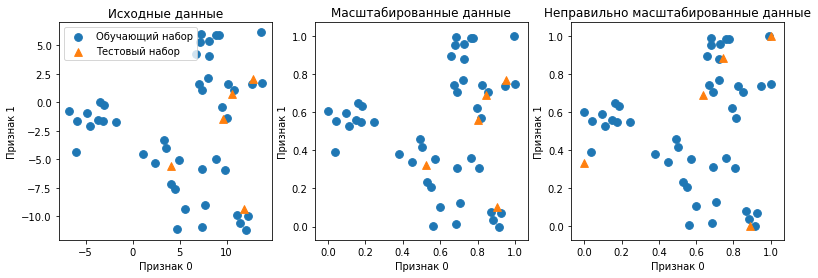

In [7]:
#Чтобы модель контролируемого обучения работала на тестовом наборе, важно преобразовать обучающий и тестовый наборы одинаковым
#образом. Следующий пример показывает, что произошло бы, если бы мы использовали минимальное значение и ширину диапазона,
#отдельно вычисленные для тестового набора:

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
# создаем синтетические данные
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# разбиваем их на обучающий и тестовый наборы
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# размещаем на графике обучающий и тестовый наборы
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], label="Обучающий набор", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', label="Тестовый набор", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Исходные данные")

# масштабируем данные с помощью MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# визуализируем правильно масштабированные данные
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], label="Обучающий набор", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', label="Тестовый набор", s=60)
axes[1].set_title("Масштабированные данные")

# масштабируем тестовый набор отдельно
# чтобы в тестовом наборе min значение каждого признака было равно 0
# а max значение каждого признака равнялось 1
# НЕ ДЕЛАЙТЕ ТАК! Только в ознакомительных целях.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# визуализируем неправильно масштабированные данные
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], label="Обучающий набор", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],marker='^', label="Тестовый набор", s=60)
axes[2].set_title("Неправильно масштабированные данные")
for ax in axes:
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
plt.show()

In [8]:
#посмотрим, как использование MinMaxScaler повлияет на обучение SVC
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(svm.score(X_test, y_test)))

Правильность на тестовом наборе: 0.63


In [9]:
#Теперь давайте отмасштабируем данные с помощью MinMaxScaler перед тем, как подгонять SVC
# предварительная обработка с помощью шкалирования 0-1
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# построение SVM на масштабированных обучающих данных
svm.fit(X_train_scaled, y_train)
# оценка правильности для масштабированного тестового набора
print("Правильность на масштабированном тестовом наборе: {:.2f}".format(
svm.score(X_test_scaled, y_test)))

Правильность на масштабированном тестовом наборе: 0.97


In [11]:
# предварительная обработка с помощью масштабирования
# нулевым средним и единичной дисперсией
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# построение SVM на масштабированных обучающих данных
svm.fit(X_train_scaled, y_train)
# оценка правильности для масштабированного тестового набора
print("Правильность SVM на тестовом наборе: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Правильность SVM на тестовом наборе: 0.96
